In [1]:
import torch
import numpy

from torch import tensor
from torch import nn
from torch import optim
from torch.autograd import Variable

from numpy import array

# Parameters

In [2]:
# Number of recognized words you put in input
nb_input = 3

# Number of classe, constant
nb_output = 6

# Number of hidden layers
nb_hidd_lay = 3

# RNN implementation
Using ReLU, and CrossEntropy

In [3]:
class RNN(nn.Module):
    def __init__(self, nb_inputs, nb_layers, nb_neurons, nb_outputs, learning_rate):
        super(RNN, self).__init__()
        
        # Applying RNN layer, and softmax then
        self.rnn = nn.RNN(input_size=nb_inputs, num_layers=nb_layers,
                   hidden_size=nb_neurons, dropout=0.5, batch_first=True, nonlinearity='relu')
        self.softmax = nn.Softmax(nb_outputs)
        
        # Other usefull variables here
        self.optimizer = optim.Adam(self.parameters(), lr=learning_rate)
        self.input_dim = nb_inputs
        self.output_dim = nb_output
        self.nb_layers = nb_layers
        self.nb_neurons = nb_neurons
        
    def forward(self, inputs):
        h0 = Variable(torch.zeros(self.nb_layers, inputs.size(0), self.nb_neurons))
        x, hn = self.rnn(inputs, h0)
        return self.softmax(x)

# End of the class RNN

# Now let's define learn(), which learn a RNN some data
def learn(rnn, batch_list, num_epochs=1):
    
    # Preparing
    rnn.train()
    losses = []
    criterion = nn.CrossEntropyLoss()

    for epoch in range(num_epochs):
        for batch_idx, (data, target) in enumerate(batch_list):
            data, target = Variable(data), Variable(target)
            
            output = rnn(data)
            loss = criterion(output, target)
            
            losses.append(loss.data.item())

            rnn.optimizer.zero_grad()

            loss.backward()
            rnn.optimizer.step()
            
            # Print the progress
            if batch_idx % 100 == 0 or batch_idx % 100 == 1 or batch_idx == len(batch_list)-1:
                print('\r Train Epoch: {} [{}/{} ({:.0f}%)]\t Loss: {:.6f}'.format(
                        epoch, 
                        (batch_idx+1) * len(data), 
                        len(batch_list),
                        100. * (batch_idx+1) / len(batch_list), 
                        loss.data.item()), 
                        end='')
        print()
        
    # Return losses list, you can print them later if you want
    return losses

# Example - Let's try our RNN
Dans cet exemple, nous avons un dataset très basique. Nous avons 2 outputs. Si dans la séquence donnée, une entrée est égale à 1, alors on attendra que la première sortie soit activée. Autrement, nous nous attendrons à ce que la seconde sortie soit activée

In [4]:
# Basically, meet a 1 and activate the first output; the second one if only 0 have been encountered
batch_list = [
    [tensor([[ [0., 0.], [0., 0.] ]]), tensor([ [0, 1] ])],
    [tensor([[ [0., 0.], [0., 0.], [0., 0.] ]]), tensor([ [0, 1] ])],
    [tensor([[ [0., 0.], [0., 0.], [0., 0.], [0., 0.] ]]), tensor([ [0, 1] ])],
    [tensor([[ [0., 0.], [0., 0.], [0., 0.], [0., 0.], [0., 0.] ]]), tensor([ [0, 1] ])],
    [tensor([[ [1., 0.], [0., 0.], [0., 0.] ]]), tensor([ [1, 0] ])],
    [tensor([[ [0., 0.], [1., 1.], [0., 0.] ]]), tensor([ [1, 0] ])],
    [tensor([[ [0., 0.], [1., 0.], [1., 0.] ]]), tensor([ [1, 0] ])],
    [tensor([[ [1., 0.], [1., 0.], [1., 0.] ]]), tensor([ [1, 0] ])]
]

rnn = RNN(nb_inputs = 2, nb_layers=3, nb_neurons=2, nb_outputs=2, learning_rate=0.01)

losses = learn(rnn, batch_list, 100)


 Train Epoch: 0 [8/8 (100%)]	 Loss: 1.146070
 Train Epoch: 1 [8/8 (100%)]	 Loss: 1.130083
 Train Epoch: 2 [8/8 (100%)]	 Loss: 1.145749
 Train Epoch: 3 [8/8 (100%)]	 Loss: 1.198179
 Train Epoch: 4 [8/8 (100%)]	 Loss: 1.143978
 Train Epoch: 5 [8/8 (100%)]	 Loss: 1.187116
 Train Epoch: 6 [8/8 (100%)]	 Loss: 1.143164
 Train Epoch: 7 [8/8 (100%)]	 Loss: 1.142376
 Train Epoch: 8 [8/8 (100%)]	 Loss: 1.132110
 Train Epoch: 9 [8/8 (100%)]	 Loss: 1.140786
 Train Epoch: 10 [8/8 (100%)]	 Loss: 1.111377
 Train Epoch: 11 [8/8 (100%)]	 Loss: 1.161579
 Train Epoch: 12 [8/8 (100%)]	 Loss: 1.142732
 Train Epoch: 13 [8/8 (100%)]	 Loss: 1.017278
 Train Epoch: 14 [8/8 (100%)]	 Loss: 1.098638
 Train Epoch: 15 [8/8 (100%)]	 Loss: 1.196145
 Train Epoch: 16 [8/8 (100%)]	 Loss: 1.114196
 Train Epoch: 17 [8/8 (100%)]	 Loss: 1.195812
 Train Epoch: 18 [8/8 (100%)]	 Loss: 1.190874
 Train Epoch: 19 [8/8 (100%)]	 Loss: 1.136798
 Train Epoch: 20 [8/8 (100%)]	 Loss: 1.013472
 Train Epoch: 21 [8/8 (100%)]	 Loss: 1.14652

Maintenant, nous affichons notre courbe d'erreur

Elle semble la même au fil du temps ici, parce que l'on a vraiment très peu de données

(Code provenant du TP de Barrault)

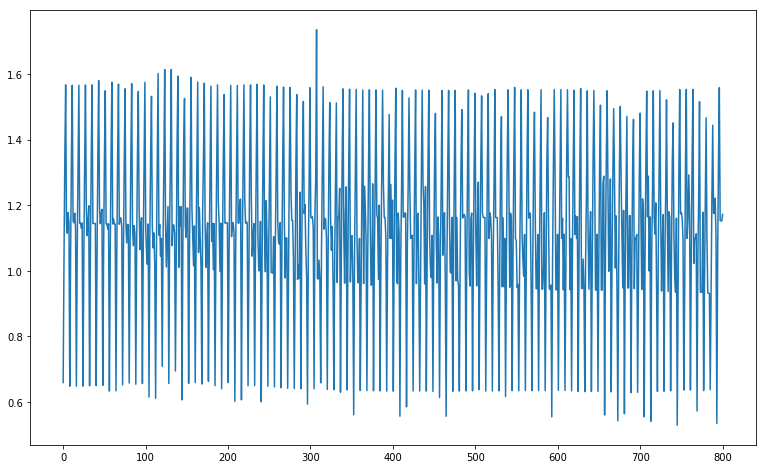

interactive(children=(IntSlider(value=51, description='smooth', max=201, min=5, step=2), Output()), _dom_class…

In [6]:
from scipy.signal import savgol_filter
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

x = np.linspace(0, len(losses), len(losses))
fig = plt.figure(figsize=(13, 8)) 
ax = fig.add_subplot(1,1,1)
cnn_line, = ax.plot(x, losses)

def update_losses(smooth=51):
    cnn_line.set_ydata(savgol_filter(losses, smooth, 3))
    fig.canvas.draw()

interact(update_losses, smooth=(5, 201, 2));
